# UK Produce Analysis Nov 2017 - March 2022
#### Cameron Peace

## Data Background

This dataset can be found [here](https://www.kaggle.com/datasets/datota/fruit-and-vegatable-prices-in-uk-2017-2022) on kaggle.com.  

Very little information is given on it's provenance other than "we extracted data from multiple sources and merged".  Although the provenance is murky, we'll treat it as real data for the purposes of this EDA.

<mark>**Kaggle Description:**</mark>

<font color='dodgerblue' size=4><i>
***This series gives the average wholesale prices of selected home-grown horticultural produce in England and Wales. These are averages of the most usual prices charged by wholesalers for selected home-grown fruit, vegetables and cut flowers at the wholesale markets in UK***
</i></font>



### Data Dictionary

***category*** - category of item (vegetable, fruit, cut_flowers, pot_plants)

***item*** - specific item (e.g. parsnips, pears, coriander)

***variety*** - further specification/delineation of item

***date*** - date between 11/02 2017 - 3/10 2022

***price*** - price in specified units

***unit*** - unit of measure (e.g. kg, per item, etc.)

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading, Viewing the Data

In [2]:
df = pd.read_csv('fruitvegprices-2017_2022.csv')

In [3]:
# initial view of a sample of the data
df.sample(5)

,category,item,variety,date,price,unit
363,vegetable,cabbage,savoy,2021-12-10,0.56,head
8946,vegetable,parsnips,all_varieties,2018-03-16,0.80,kg
8938,vegetable,cucumbers,cucumbers,2018-03-16,0.53,kg
2849,vegetable,onion,bulb_red,2020-10-23,0.54,kg
829,vegetable,cabbage,summer_autumn_pointed,2021-10-01,0.58,kg


In [4]:
# more information and summary statistics
display(df.describe(include='all'), df.info(), df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9647 entries, 0 to 9646
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  9647 non-null   object 
 1   item      9647 non-null   object 
 2   variety   9647 non-null   object 
 3   date      9647 non-null   object 
 4   price     9647 non-null   float64
 5   unit      9647 non-null   object 
dtypes: float64(1), object(5)
memory usage: 452.3+ KB


,category,item,variety,date,price,unit
count,9647,9647,9647,9647,9647.000000,9647
unique,4,54,77,218,NaN,5
top,vegetable,apples,red,2018-09-28,NaN,kg
freq,7264,1077,353,65,NaN,7888
mean,NaN,NaN,NaN,NaN,1.528333,NaN
std,NaN,NaN,NaN,NaN,1.927865,NaN
min,NaN,NaN,NaN,NaN,0.020000,NaN
25%,NaN,NaN,NaN,NaN,0.540000,NaN
50%,NaN,NaN,NaN,NaN,0.880000,NaN
75%,NaN,NaN,NaN,NaN,1.500000,NaN


None

Index(['category', 'item', 'variety', 'date', 'price', 'unit'], dtype='object')

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i> * We have 9647 entries and it appears no missing values in this dataset.  There are 4 categories of items, 54 item types, and 77 further delineations of item types in this dataset.
 
<font color='dodgerblue' size=4><i> * Because the data is from the UK, weights are given in kg, we may convert this to get a better sense of price.  We could also convert to USD as well (assuming pounds due to UK), although that might be tricky with changing conversion rates.
    
<font color='dodgerblue' size=4><i> * The 'date' column is currently in string format, using datetime might make certain operations easier.
    
<font color='dodgerblue' size=4><i> * There is at least one significant outlier in the price column (£17.60, mean = £1.53).  Will explore.
    
</i></font>

### Cleaning the data

### Checking for missing, duplicate entries

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

category    0
item        0
variety     0
date        0
price       0
unit        0
dtype: int64

### Checking for incorrect/double entries

In [7]:
# printing out unique values for categorical entries to check for errors
for i in df.columns:
    if df[i].dtype == 'object' or df[i].nunique() <= 10:
        print('*******\n')
        print(i.upper(), df[i].unique(), df[i].dtype)

*******

CATEGORY ['fruit' 'vegetable' 'cut_flowers' 'pot_plants'] object
*******

ITEM ['apples' 'pears' 'beetroot' 'brussels_sprouts' 'pak_choi' 'curly_kale'
 'cabbage' 'spring_greens' 'carrots' 'cauliflower' 'celeriac' 'cucumbers'
 'leeks' 'lettuce' 'onion' 'swede' 'turnip' 'parsnips' 'rhubarb' 'tulips'
 'capsicum' 'chinese_leaf' 'celery' 'tomatoes' 'coriander' 'spinach_leaf'
 'raspberries' 'calabrese' 'strawberries' 'blackberries' 'rocket'
 'mixed_babyleaf_salad' 'gladioli' 'sweetcorn' 'currants' 'blueberries'
 'beans' 'courgettes' 'plums' 'peas' 'cherries' 'gooseberries' 'asparagus'
 'watercress' 'alstromeria' 'lillies' 'narcissus' 'cyclamen' 'poinsettia'
 'chrysanthemum' 'geranium' 'stocks' 'sweet_williams' 'peony'] object
*******

VARIETY ['bramleys_seedling' 'coxs_orange_group' 'egremont_russet' 'braeburn'
 'gala' 'other_late_season' 'conference' 'doyenne_du_comice' 'beetroot'
 'brussels_sprouts' 'pak_choi' 'curly_kale' 'red' 'savoy' 'prepacked'
 'white' 'round_green_other' 'to

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Everything looks fairly clean.  There are a couple likely redundant values in the "variety" column that could be cleaned up (e.g. 'pillow_pack', 'pillow_packs').

<font color='dodgerblue' size=4><i>
The 5 types of units found here:  **'kg', 'head', 'twin', 'stem', 'unit'**
    
<font color='dodgerblue' size=4><i>
The 4 types of categories found here:  **'fruit', 'vegetable', 'cut_flowers', 'pot_plants'**

### Cleaning redundant values in 'varieties' column

#### Cleaning 'pillow_pack' redundancies

In [8]:
# checking to get a baseline of values
# this code shows us both 'pillow_pack' and 'pillow_packs'
pillows = df[df['variety'].str.contains('pillow_pack')]
pillows

,category,item,variety,date,price,unit
578,vegetable,mixed_babyleaf_salad,pillow_pack,2021-11-05,5.00,kg
626,vegetable,mixed_babyleaf_salad,pillow_pack,2021-10-29,4.85,kg
679,vegetable,mixed_babyleaf_salad,pillow_pack,2021-10-22,4.78,kg
734,vegetable,mixed_babyleaf_salad,pillow_pack,2021-10-15,5.07,kg
791,vegetable,mixed_babyleaf_salad,pillow_pack,2021-10-08,5.05,kg
...,...,...,...,...,...,...
9534,vegetable,watercress,pillow_packs,2017-11-17,10.75,kg
9575,vegetable,mixed_babyleaf_salad,pillow_pack,2017-11-10,4.28,kg
9586,vegetable,watercress,pillow_packs,2017-11-10,10.14,kg
9630,vegetable,mixed_babyleaf_salad,pillow_pack,2017-11-03,2.95,kg


In [9]:
# looking at exactly what categories and items are represented here
pillows.groupby(['category', 'item', 'variety']).size().reset_index(name='n_each')

,category,item,variety,n_each
0,vegetable,mixed_babyleaf_salad,pillow_pack,115
1,vegetable,watercress,pillow_packs,92


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Looks like this variety label is indeed redundant and we can safely merge these two categories.  This may be inconsequential, but may be important if we're looking at items grouped by varieties.
</i></font>

In [10]:
# changing all entries with 'pillow_packs' to 'pillow_pack'
df.loc[df['variety'] == 'pillow_packs', 'variety'] = 'pillow_pack'

In [11]:
# verifying changes
display(df[df['variety'].str.contains('pillow_pack')]['variety'].unique(), df.shape)

array(['pillow_pack'], dtype=object)

(9647, 6)

#### Cleaning values including 'all' from 'varieties' column

In [12]:
# looking at unique values for this column
df[df['variety'].str.contains('all')]['variety'].unique()

array(['all', 'all_varieties', 'all_washed', 'all_other',
       'shelling_all_varieties'], dtype=object)

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
'all' and 'all_varieties' seem redundant, the other values seem to be adding information.
</i></font>

In [13]:
# subsetting to look at those specific values
all_var = df[(df['variety'].str.contains('all$')) | (df['variety'].str.contains('^all_varieties'))]

# displaying what categories and items they contain
all_var.groupby(['category', 'item', 'variety']).size().reset_index(name='n_occurences')

,category,item,variety,n_occurences
0,cut_flowers,gladioli,all_varieties,68
1,fruit,cherries,all,45
2,vegetable,cauliflower,all,218
3,vegetable,parsnips,all_varieties,211


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
This is another column with what looks like redundant information.  I'm going to keep 'all_varieties' because I feel like it conveys more information
</i></font>

In [14]:
# changing 'all' to 'all_varieties'
df.loc[df['variety'] == 'all', 'variety'] = 'all_varieties'

# verifying changes
display(df[df['variety'].str.contains('all')]['variety'].unique(), df.shape)

array(['all_varieties', 'all_washed', 'all_other',
       'shelling_all_varieties'], dtype=object)

(9647, 6)

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Looks like all of these changes were successfully implemented
</i></font>

### Checking for outliers in 'price'

In [15]:
# filtering by prices at or above £8, then looking at max price of specific items
# using chained operations for clarity
(df
     [df['price'] >= 8] # filtering step
     .groupby(['category', 'item', 'variety'])
     ['price'].max()
     .reset_index(name='max_price')
     .sort_values('max_price', ascending=False)
)

,category,item,variety,max_price
5,fruit,raspberries,raspberries,17.60
7,vegetable,asparagus,asparagus,16.96
4,fruit,gooseberries,gooseberries,13.22
0,fruit,blackberries,blackberries,13.20
1,fruit,blueberries,blueberries,13.20
9,vegetable,watercress,pillow_pack,12.68
6,fruit,strawberries,strawberries,10.74
3,fruit,currants,red,10.00
2,fruit,currants,black,9.60
8,vegetable,rocket,rocket,9.04


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
It's difficult to make a judgment call here with a subject matter expert, but it's looks to me like these may be within the range of normal.  We will leave them be in the data unless we build a predictive model where outliers need to be removed.
</i></font>

## Exploratory Data Viz

### Which Items Are Priced Highest by Weight?

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
This may be a relevant question if we're trying to prioritize items based on shipping costs, although the limiting factor here may more likely be volume (e.g. a large load of leafy greens from CA may be lighter, there is only so much space can be conserved without damaging the product).
</i></font>

In [16]:
price_by_weight = (df
     [df['unit'] == 'kg'] # filters for only items in kg
     .groupby(['category', 'item']).agg(max_price=('price', 'max'),
                                       min_price=('price', 'min'),
                                       mean_price=('price', 'mean'))
     .sort_values('mean_price', ascending=False)
    )
price_by_weight

max_price  min_price  mean_price
category  item                                                  
vegetable watercress                12.68       6.55    9.374348
          asparagus                 16.96       3.50    8.753175
fruit     raspberries               17.60       1.89    8.447228
          blueberries               13.20       2.00    7.947260
          blackberries              13.20       3.01    7.072667
          currants                  10.00       2.40    6.922656
          gooseberries              13.22       1.93    5.212683
vegetable rocket                     9.04       3.76    5.062202
          mixed_babyleaf_salad       6.40       2.95    4.887826
fruit     cherries                   6.68       2.30    4.132222
          strawberries              10.74       1.00    3.673333
vegetable curly_kale                 4.65       1.50    2.843641
          rhubarb                    6.77       1.09    2.707149
          pak_choi                   4.07       1.58    2.453211
          beans                      7.71       1.08    2.353696
          peas                       3.30       1.30    2.259375
fruit     plums                      3.58       0.88    1.910864
vegetable coriander                  5.00       0.84    1.716718
          tomatoes                   5.55       0.45    1.472494
          spinach_leaf               2.22       0.76    1.444806
          calabrese                  3.50       0.93    1.434741
          leeks                      2.10       0.84    1.292115
          turnip                     2.10       0.55    1.232332
          courgettes                 3.52       0.73    1.161852
          capsicum                   3.20       0.40    1.096568
          spring_greens              2.11       0.59    1.072339
          parsnips                   1.81       0.60    1.069289
fruit     apples                     2.75       0.32    1.019211
vegetable chinese_leaf               1.36       0.79    0.970698
          cucumbers                  1.58       0.53    0.931341
fruit     pears                      1.32       0.22    0.858013
vegetable brussels_sprouts           1.52       0.63    0.855455
          celery                     1.39       0.55    0.817500
          celeriac                   0.98       0.51    0.720183
          cabbage                    1.04       0.29    0.529034
          beetroot                   0.78       0.43    0.495183
          carrots                    0.67       0.31    0.479813
          onion                      0.85       0.15    0.460608
          swede                      0.31       0.14    0.228726

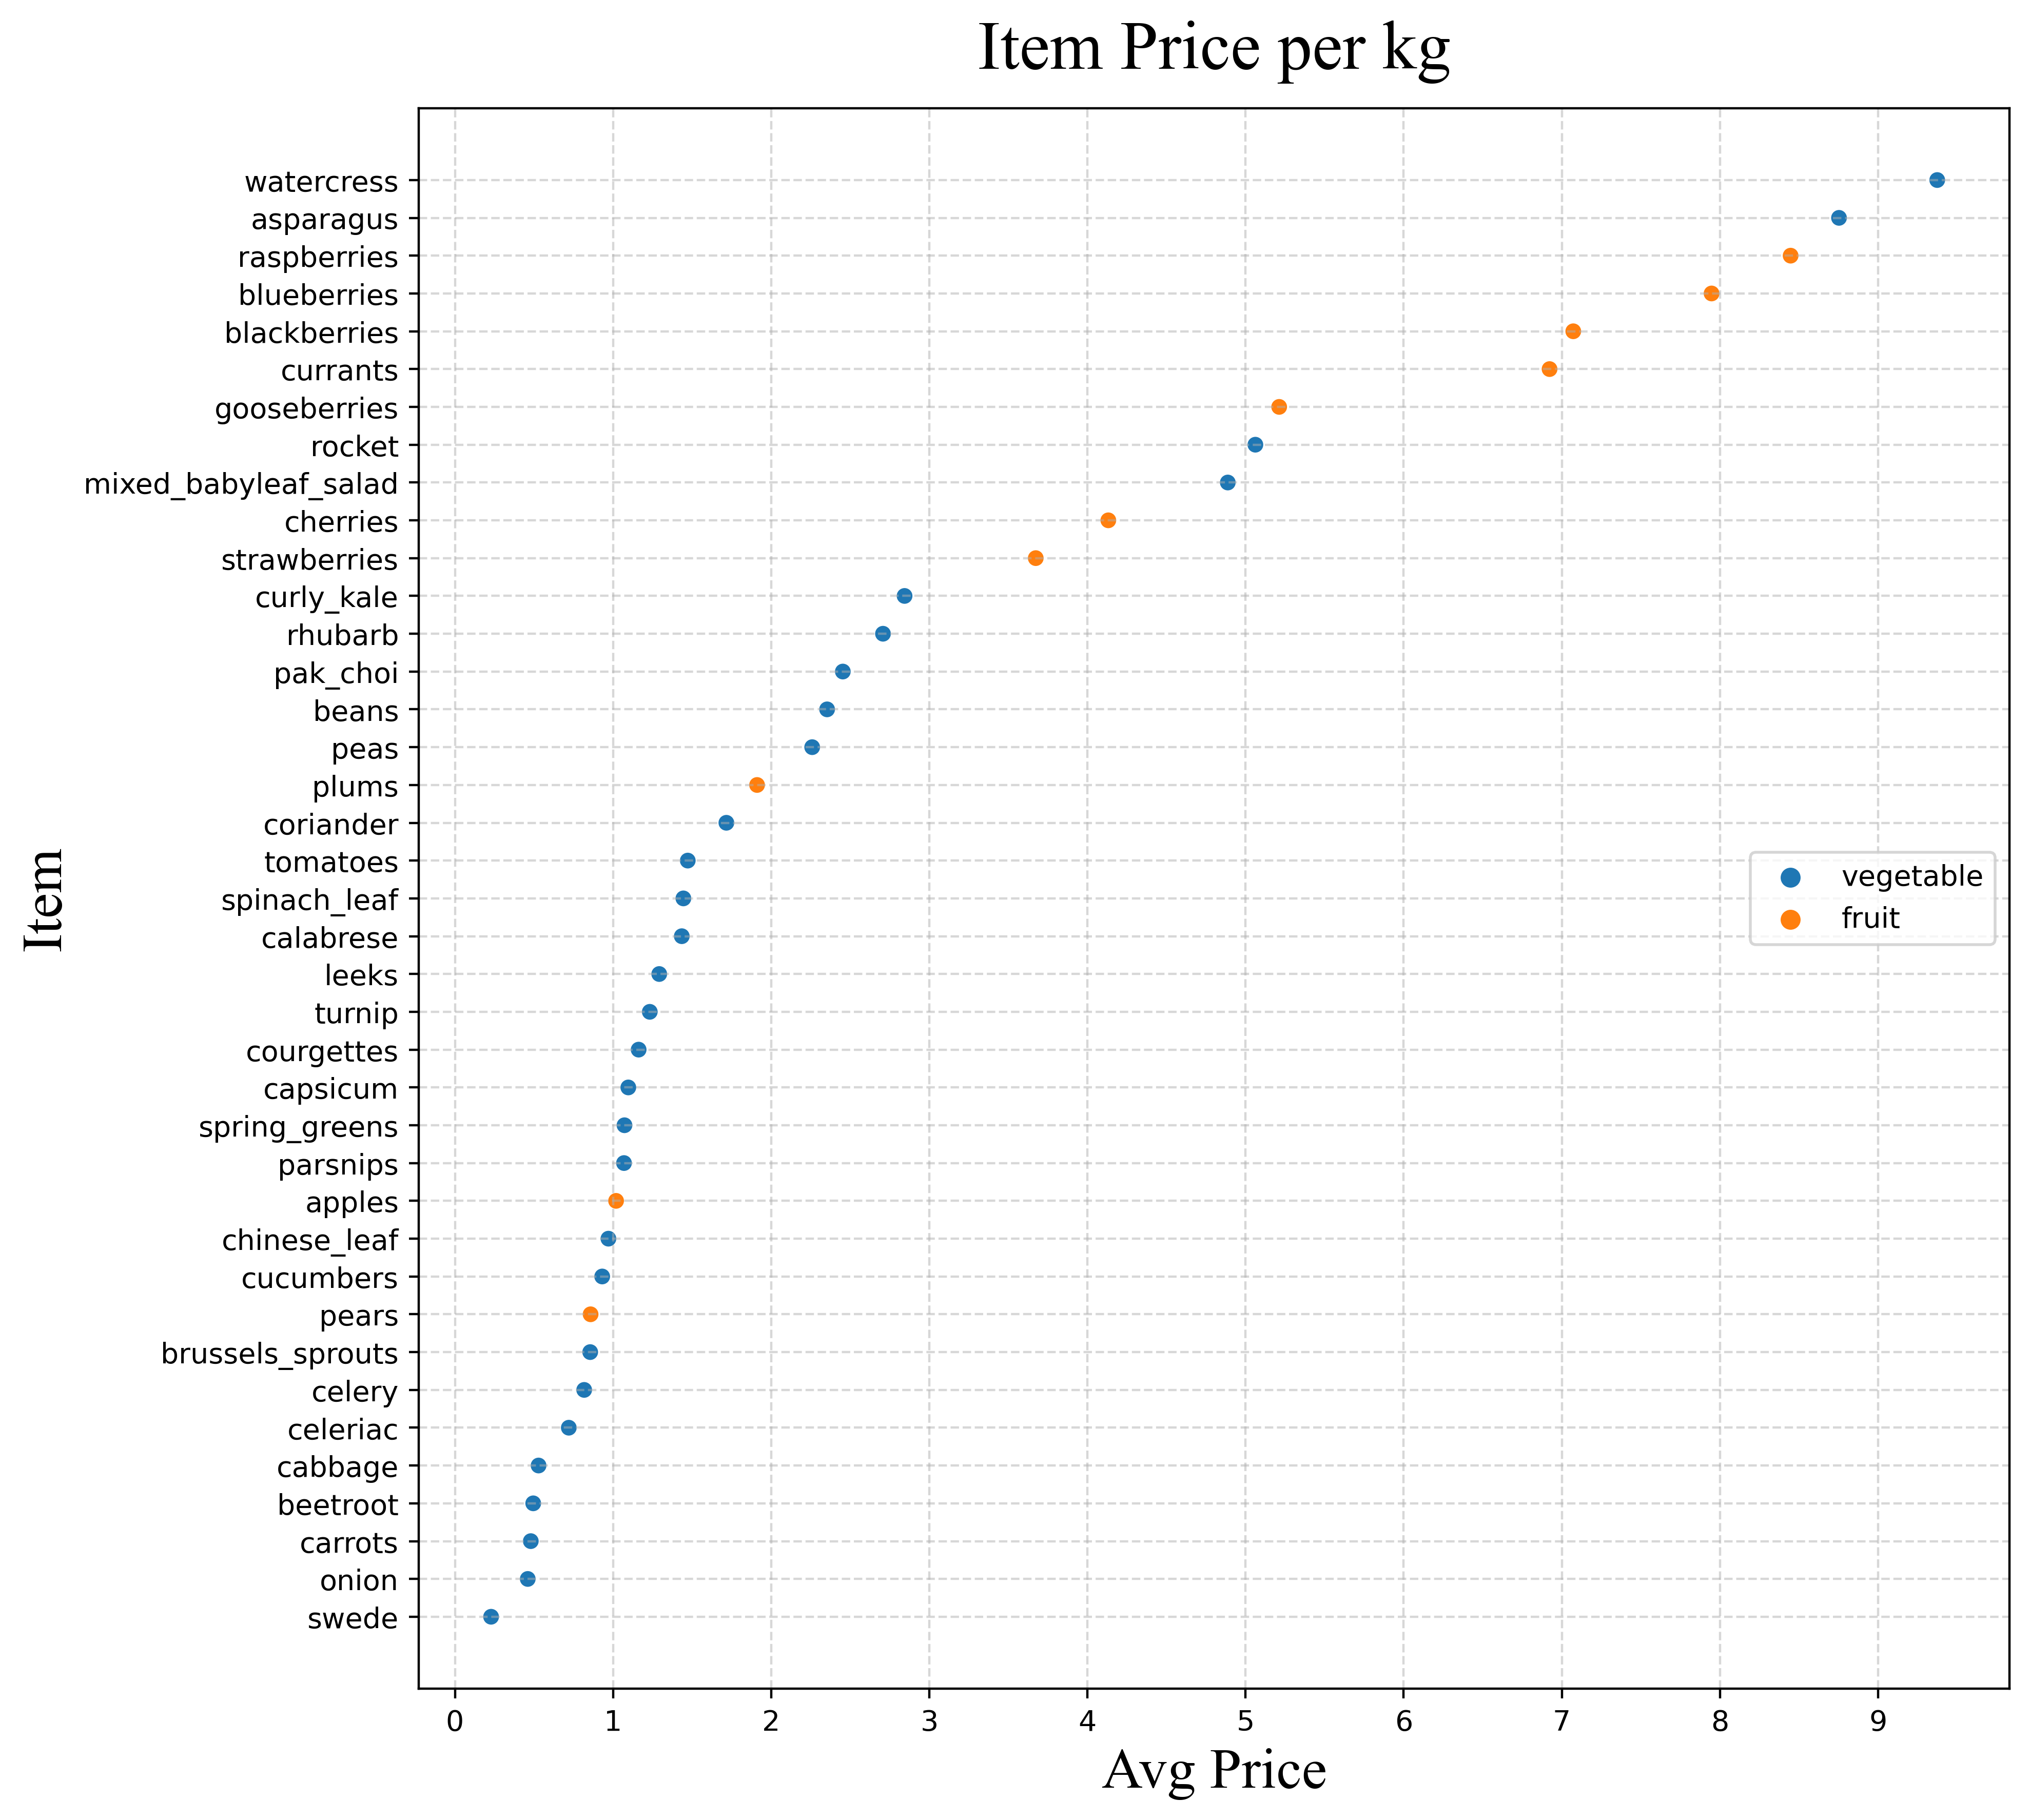

In [17]:
# plotting just average prices per kg
fig, ax = plt.subplots(figsize=(10,10), dpi=400)
sns.scatterplot(price_by_weight, y='item', x='mean_price', hue='category')
plt.title('Item Price per kg', font='times new roman', size=24, pad=14)
plt.ylabel('Item', font='times new roman', size=20)
plt.xlabel('Avg Price', font='times new roman', size=20)
plt.grid(ls='--', alpha=.5)
plt.legend(loc='center right')
plt.xticks(range(10));

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Long story short: Best bets overall are leafy greens and berries. However, inspecting the data shows some large swings in prices for these items.  I suspect this may be either seasonal, or may be related to pandemic supply chain issues.  We'll need to take a closer look at prices over time.
</i></font>

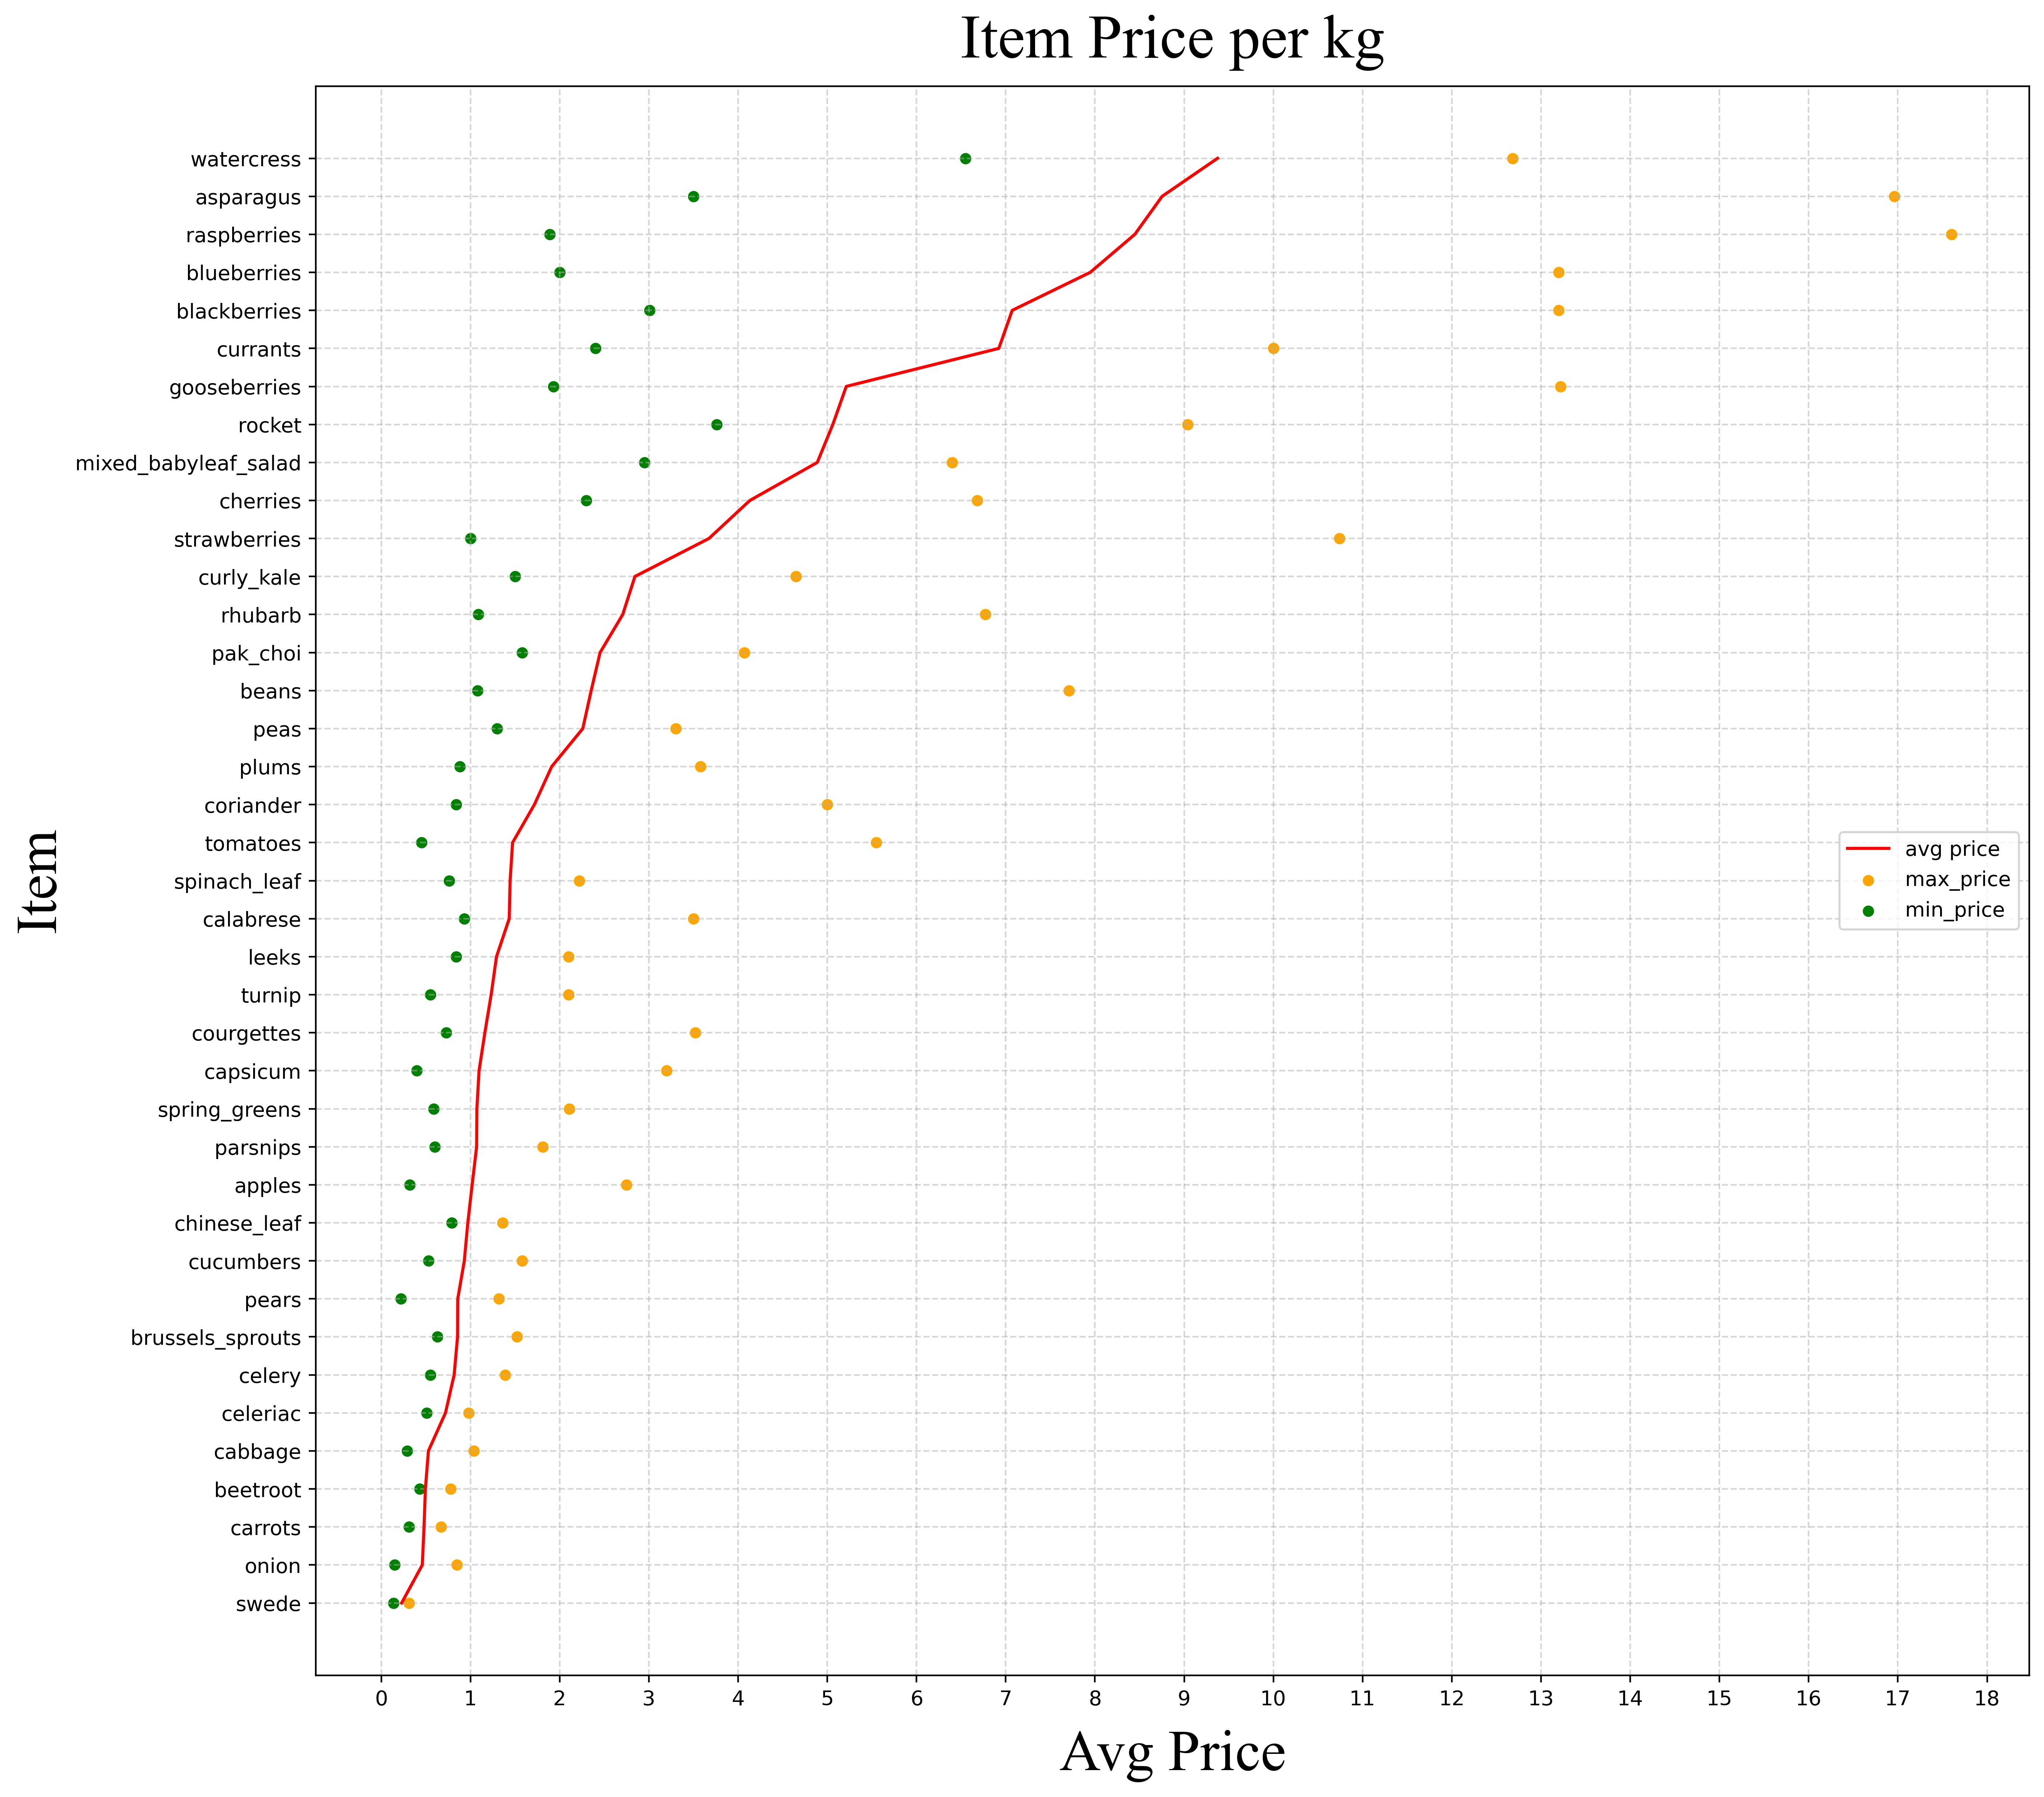

In [18]:
# plot max, min, avg on one plot
fig, ax = plt.subplots(figsize=(15,14), dpi=400)
sns.lineplot(price_by_weight, y='item', x='mean_price', c='red', label='avg price')
sns.scatterplot(price_by_weight, y='item', x='max_price', c='orange', label='max_price' )
sns.scatterplot(price_by_weight, y='item', x='min_price', c='green', label='min_price')
plt.title('Item Price per kg', font='times new roman', size=30, pad=14)
plt.ylabel('Item', font='times new roman', size=28)
plt.xlabel('Avg Price', font='times new roman', size=28, labelpad=10)
plt.grid(ls='--', alpha=.5)
plt.legend(loc='center right')
plt.xticks(range(19));

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
This combination line and scatter plot shows the average price (red line), and the maximum and minimum prices for each item.  We can see further evidence of a wide swing in prices, most notably for berries.  We'll explore this further, but my initial hunch is this is a seasonal supply/demand issue.
</i></font>

### Exploring Seasonal Trends in Price

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
I'd like to look at monthly trends in the data, so I'll be converting the date column from a string data type to a datetime format to more easily extract the month and year.
</i></font>

In [19]:
# converting 'date' to datetime dtype
df['date'] = pd.to_datetime(df['date'])

# verifying changes
df.dtypes

category            object
item                object
variety             object
date        datetime64[ns]
price              float64
unit                object
dtype: object

In [20]:
# creating two new columns 'year', 'month'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# verifying changes
df.sample(5)

,category,item,variety,date,price,unit,year,month
8020,vegetable,cabbage,summer_autumn_pointed,2018-08-03,0.56,kg,2018,8
9167,fruit,apples,egremont_russet,2018-01-26,0.88,kg,2018,1
3943,vegetable,spring_greens,prepacked,2020-06-05,1.35,kg,2020,6
6023,vegetable,cabbage,red,2019-06-21,0.82,kg,2019,6
3729,vegetable,tomatoes,cherry,2020-07-10,0.90,kg,2020,7


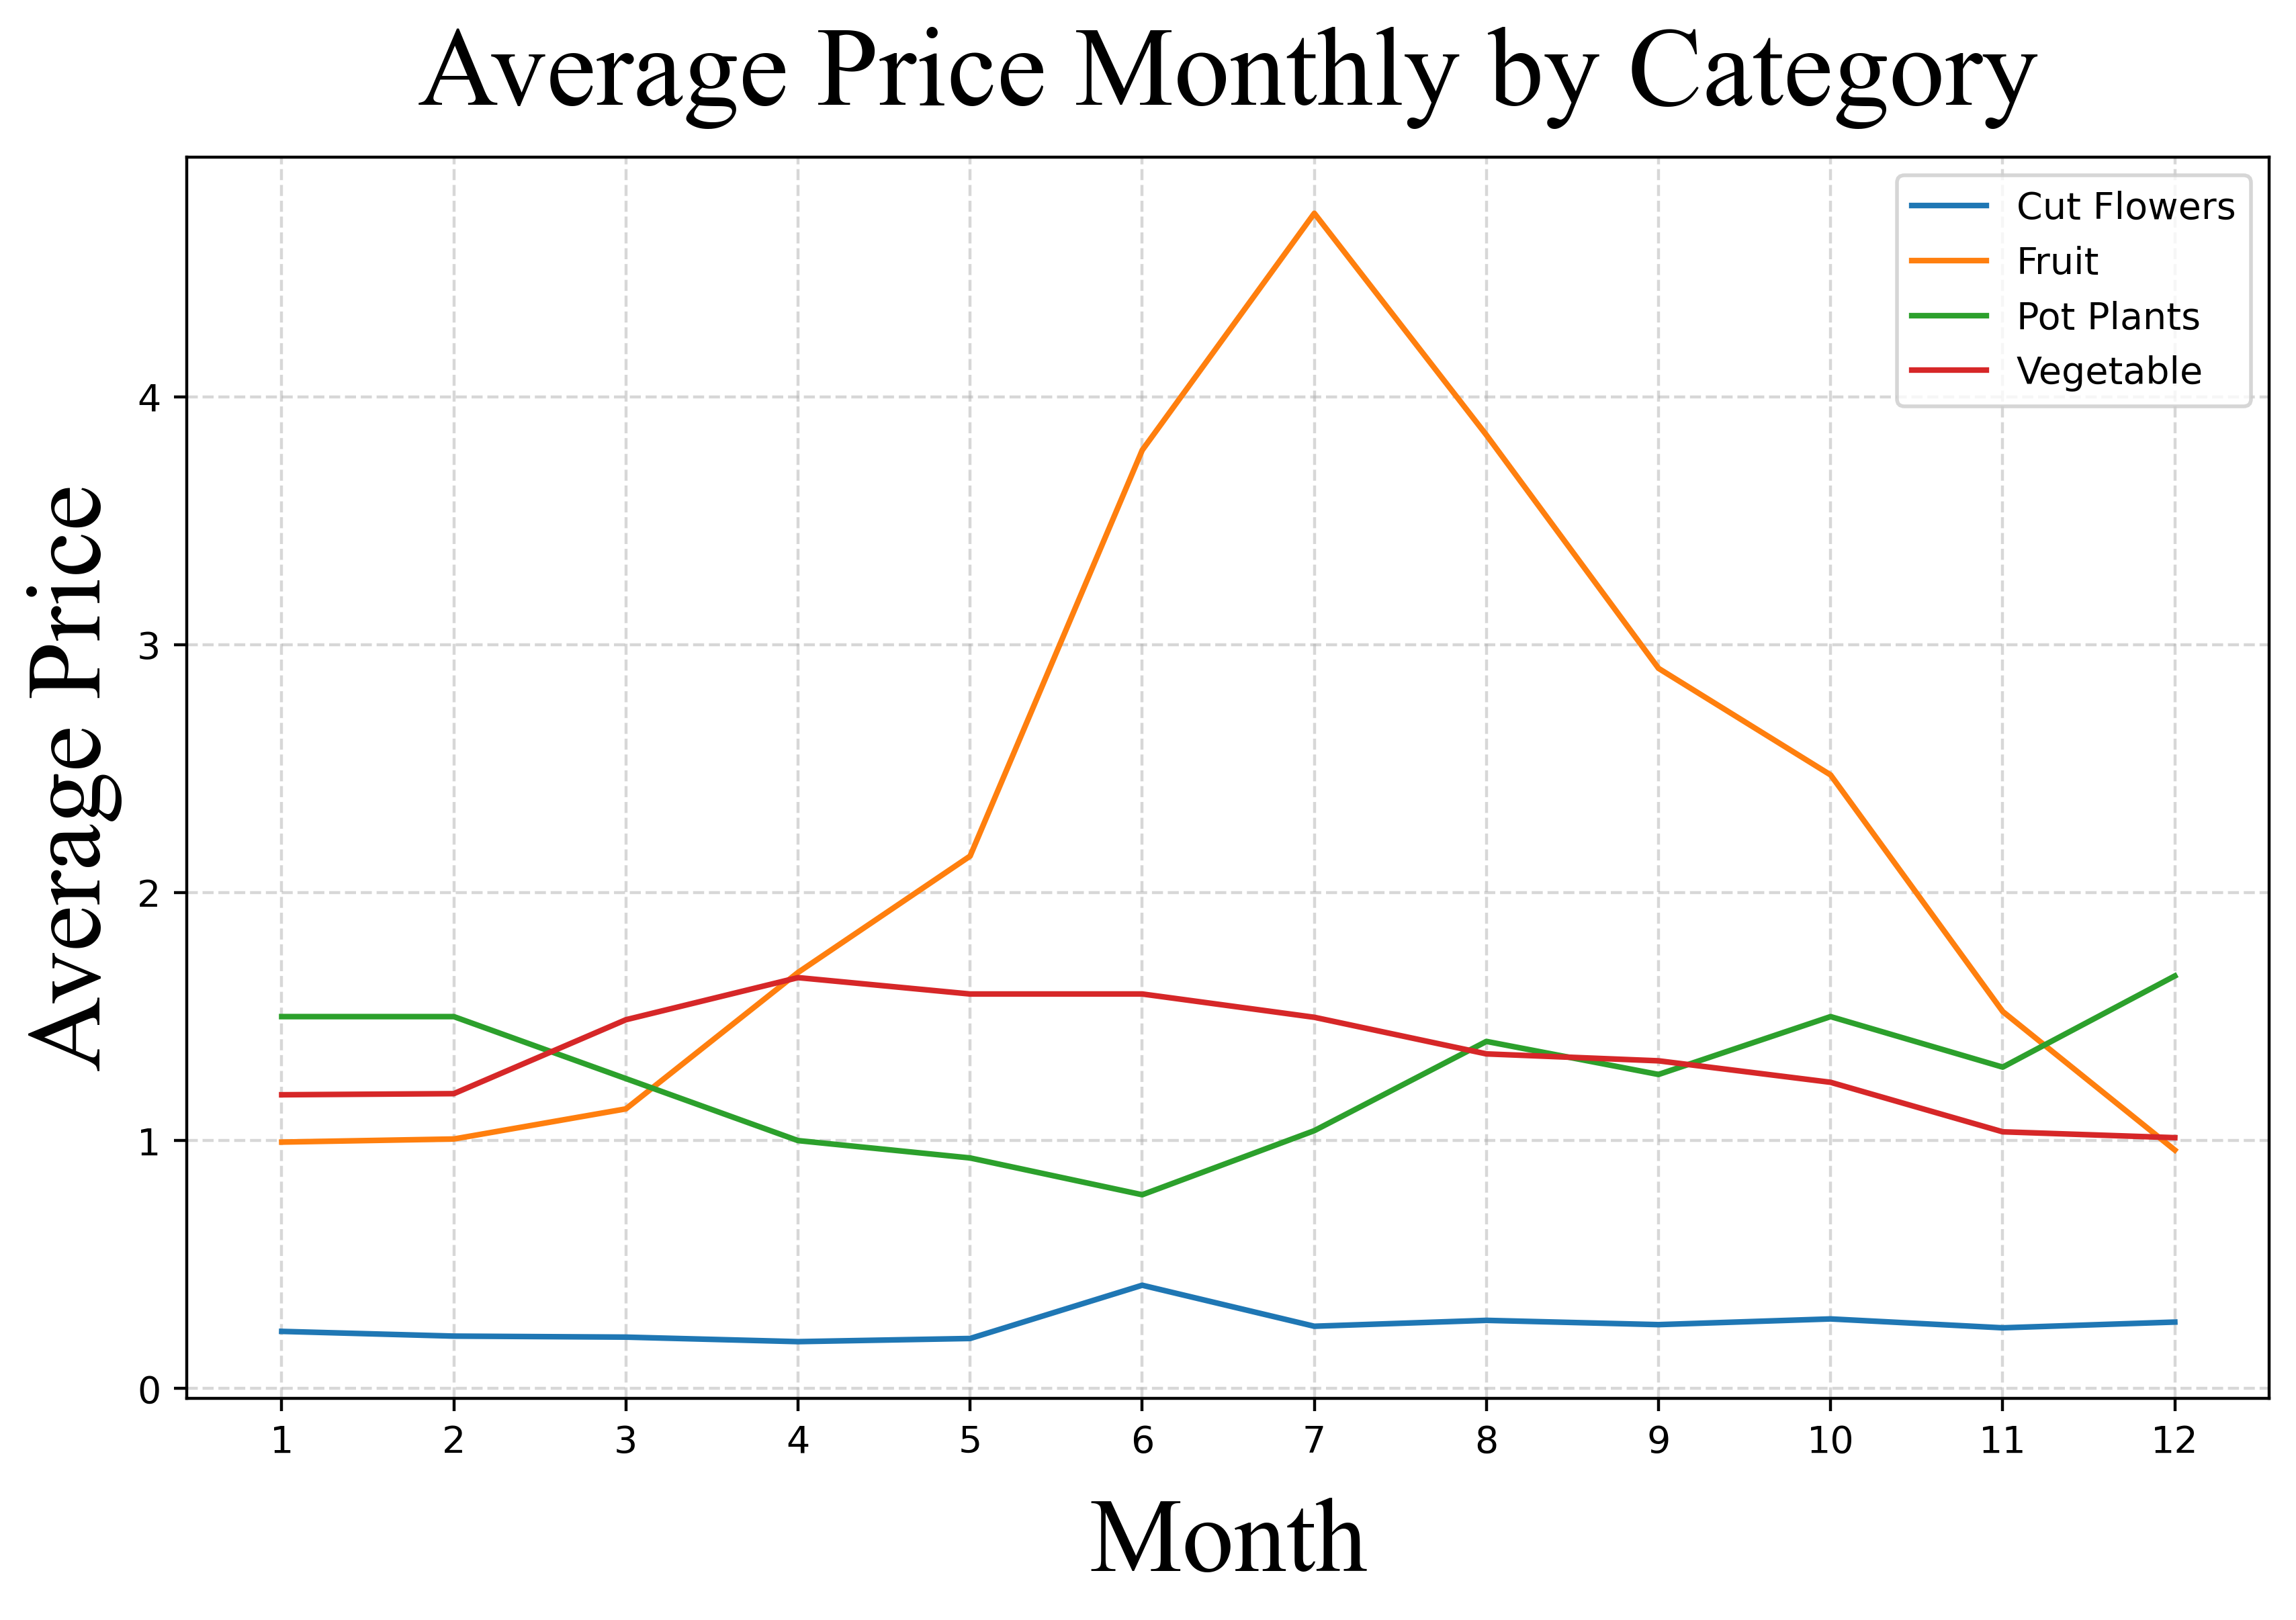

In [25]:
#setting up the group and aggregation
avg_price_df = (df
                    .groupby(['category', 'year', 'month'])
                    ['price'].mean()
                    .reset_index(name='avg_price')
               )

# plotting the average price over time for each category
plt.figure(figsize=(10, 6), dpi=400)
for category in avg_price_df['category'].unique():
    category_df = avg_price_df[avg_price_df['category'] == category]
    clean_cat = category.replace('_', ' ').title()
    sns.lineplot(data=category_df, x='month', y='avg_price', 
             label=clean_cat, errorbar=None)

plt.title('Average Price Monthly by Category', font='times new roman', size=30, pad=14)
plt.ylabel('Average Price', font='times new roman', size=28)
plt.xlabel('Month', font='times new roman', size=28, labelpad=10)
plt.grid(ls='--', alpha=.5)
plt.legend(loc='upper right')
plt.xticks(range(1, 13));

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Here we can see a clear seasonal trend driving the price of fruit.  Because this dataset represents small scale ag, I think the higher prices represent peak freshness.  It it still unclear how home-grown fruit is being grown out of season but I'm assuming in greenhouses.  I would initially think that the increased supply in spring/summer would drive that price down, but that does not seem to be the case.  It is interesting that we don't see a similar trend in the other categories, I would have thought vegetables would also be intertwined with fruit, but there must be a shelf life aspect that I'm not aware of.  Let's double check our work across multiple years.
</i></font>

In [37]:
# checking variety of item counts
df.groupby('category').size()

category
cut_flowers     342
fruit          1992
pot_plants       49
vegetable      7264
dtype: int64

### Seasonal Prices Multi Year Comparison

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
We lack data for 2017 and 2022 due to the scope of the dataset, so I'm going to restrict the years we're focusing on to 2018-2021.  I'm going to focus only on items in the 'fruit' category, since we've seen a strong seasonal trend in that area.
</i></font>

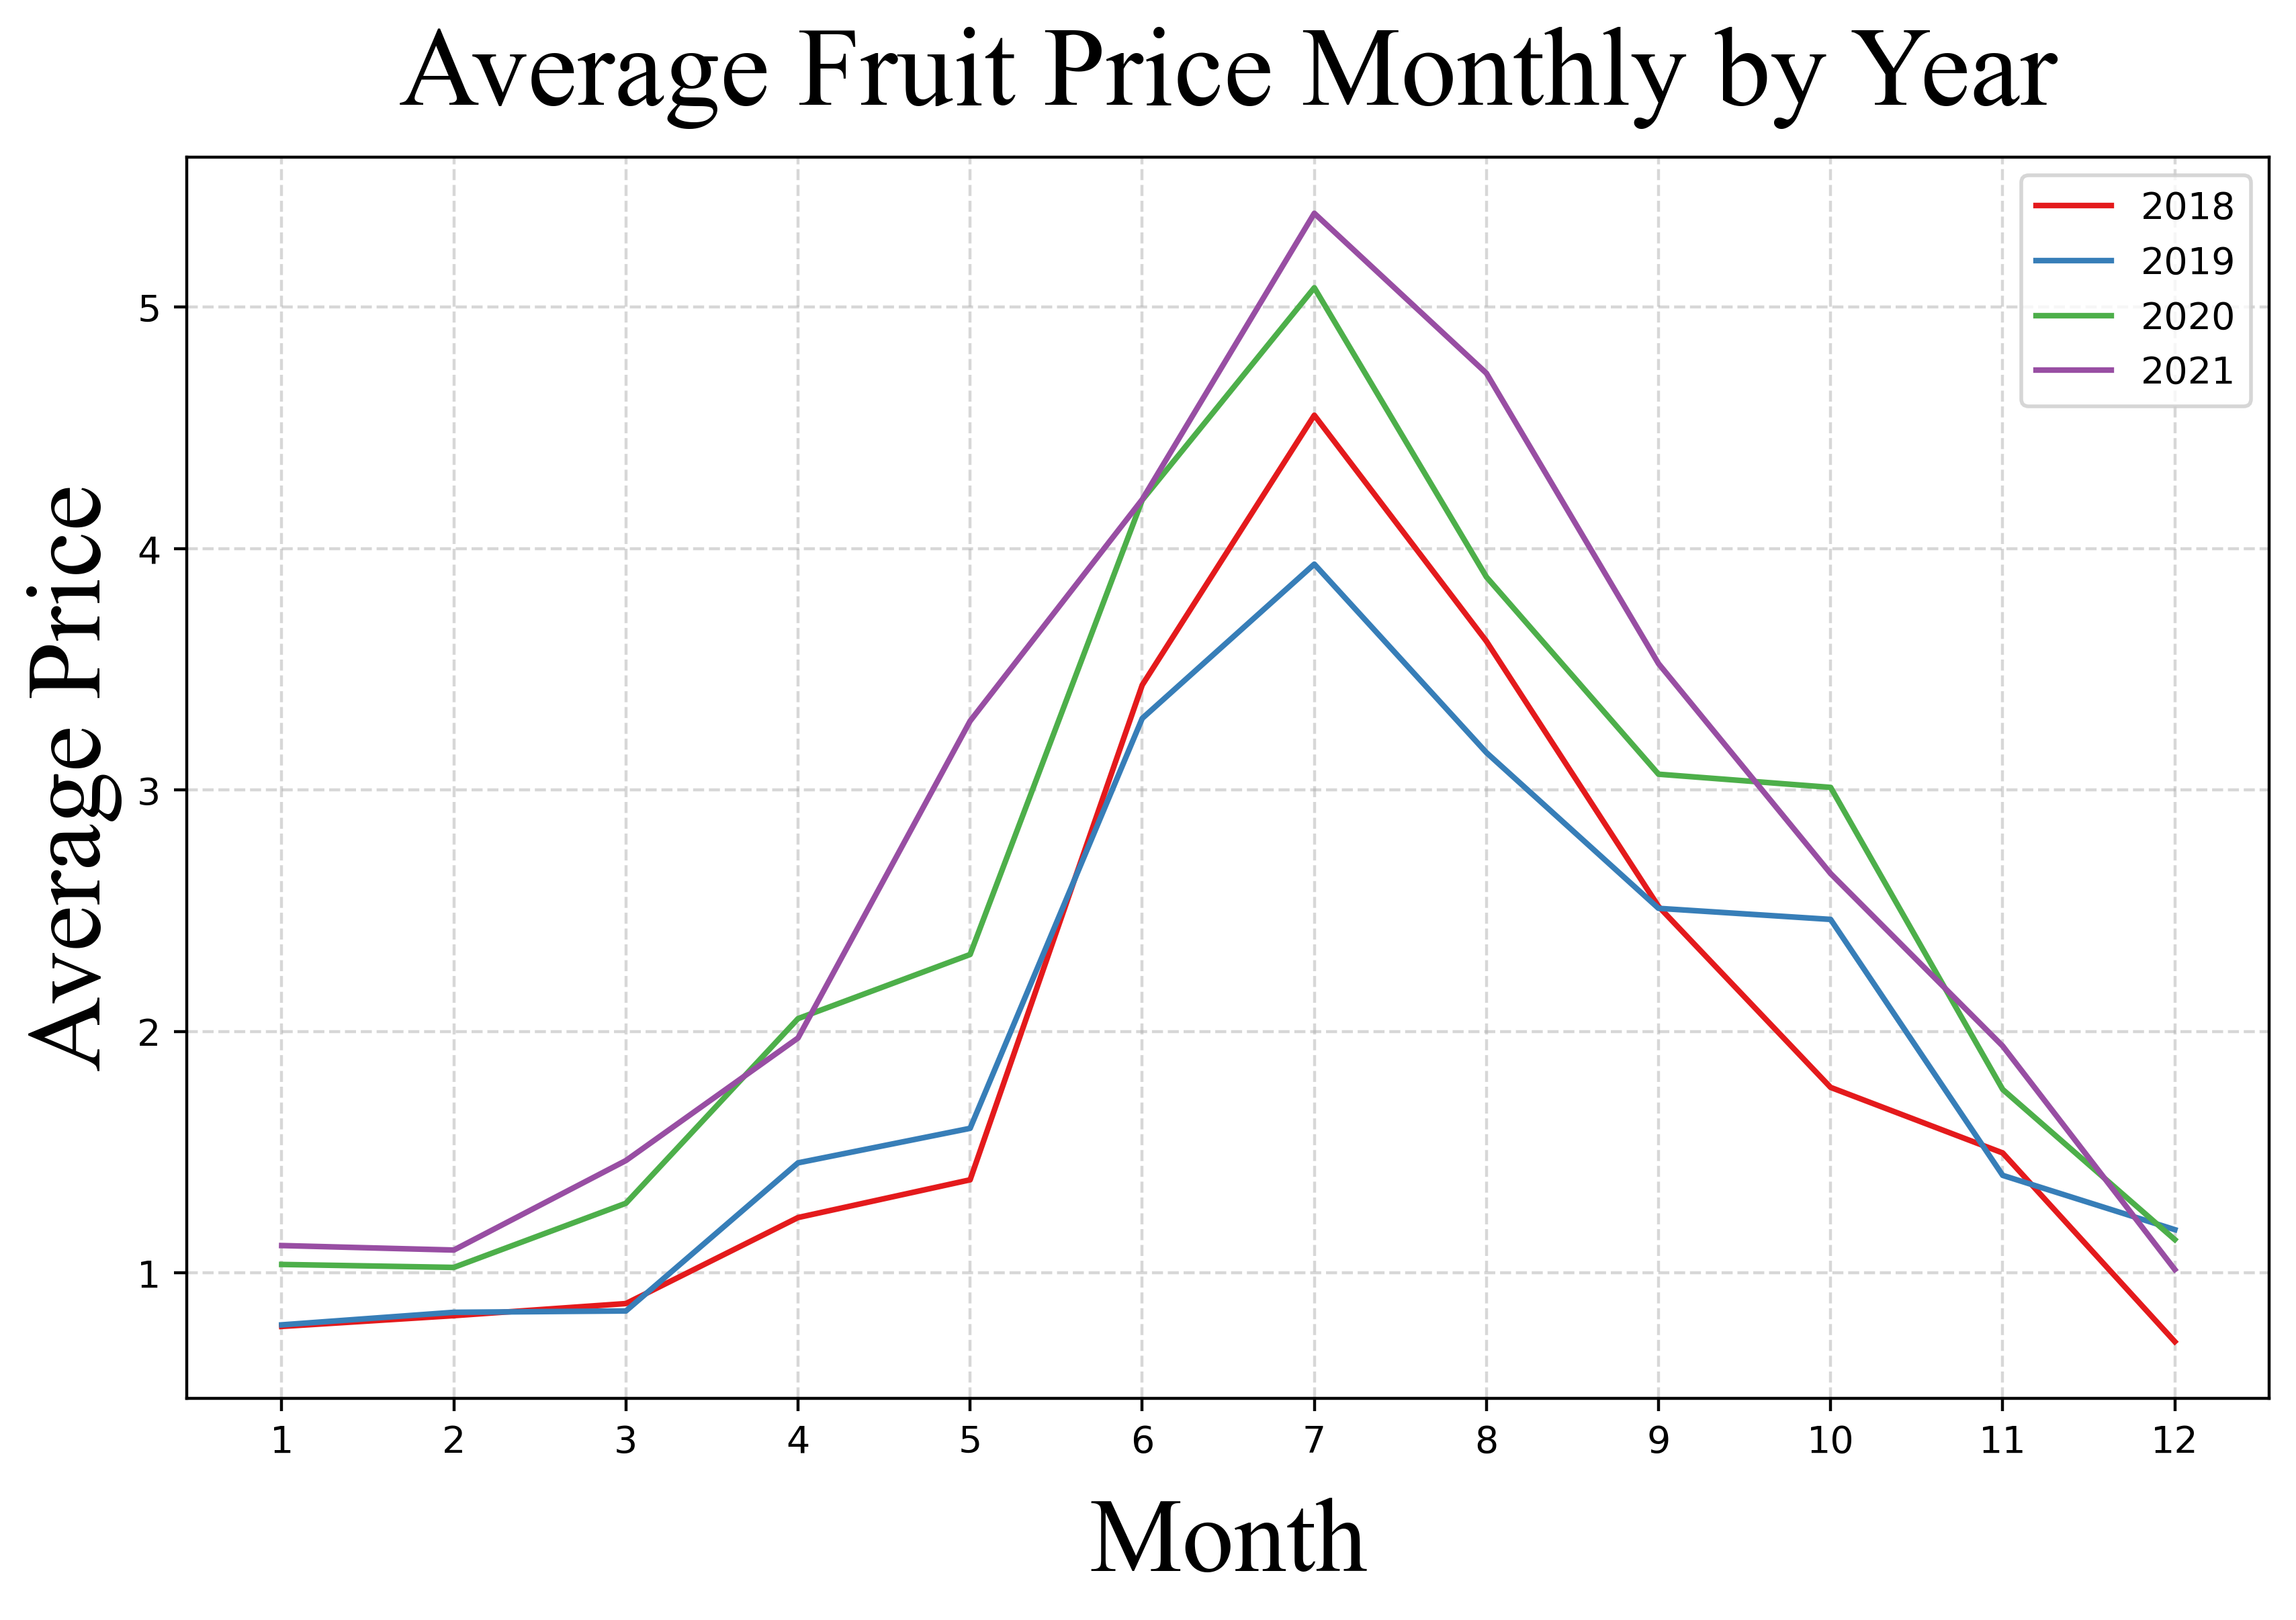

In [48]:
# filtering and subsetting the data
avg_price_fruit = (df
                    [(df['category']=='fruit') & (df['year'].between(2018, 2021))]
                    .groupby(['year', 'month'])
                    ['price'].mean()
                    .reset_index(name='avg_price')
               )

# color palette for different years
colors = sns.color_palette('Set1', n_colors=len(avg_price_fruit['year'].unique()))

plt.figure(figsize=(10, 6), dpi=400)
for i, year in enumerate(avg_price_fruit['year'].unique()):
    data_year = avg_price_fruit[avg_price_fruit['year'] == year]
    
    # Plot a line for the current year with a unique color
    sns.lineplot(data=data_year, x='month', y='avg_price', 
                 label=year, color=colors[i], errorbar=None)

plt.title('Average Fruit Price Monthly by Year', font='times new roman', size=30, pad=14)
plt.ylabel('Average Price', font='times new roman', size=28)
plt.xlabel('Month', font='times new roman', size=28, labelpad=10)
plt.grid(ls='--', alpha=.5)
plt.legend(loc='upper right')
plt.xticks(range(1, 13));

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Here we can see that the larger seasonal trend holds across multiple years
</i></font>

## Summary

<mark><u>**Comment:**

<font color='dodgerblue' size=4><i>
The main take away from this analysis is that much of profit in wholesale produce for this region is likely driven by sales of seasonal fruit.  Focusing optimization on this area is likely to pay the highest dividends.
    
<font color='dodgerblue' size=4><i> * On the other hand, there may be other factors in the data driving a sluggish seasonal bump in vegetable prices that should be explored
    
<font color='dodgerblue' size=4> * There may be room for growth in categories other than fruit that would lead to a similar seasonal bump.

## Recommendations

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Ensure that operations are centered around making the most of fruit sales under the period May to October.  Use the 'off months' to maximize this potential and to also discover options for creating a similar seasonal bump during the period November to April.
</i></font>